In [62]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [63]:
#Read file
df = pd.read_csv('Iowa_Liquor_Sales.csv')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
pd.options.display.max_columns = None
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,NaN,NaN,255.0,Wilson Daniels Ltd.,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,NaN,NaN,255.0,Wilson Daniels Ltd.,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,NaN,NaN,130.0,Disaronno International LLC,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,NaN,NaN,65.0,Jim Beam Brands,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,NaN,NaN,130.0,Disaronno International LLC,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [ ]:
df.isnull().sum()

In [65]:
#Removal of data with null
df = df.dropna()

In [66]:
#Transformation of State Bottle Cost, State Bottle Retail, Sale (Dollars) to float values
df['State Bottle Cost'] = df['State Bottle Cost'].str.extract(r'([^$]+)')
df['State Bottle Retail'] = df['State Bottle Retail'].str.extract(r'([^$]+)')
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.extract(r'([^$]+)')

In [67]:
#Conversion of columns to appropriate data type
c_df = {'Invoice/Item Number': str,
       'Store Number': int,
       'Store Name': str,
       'Address': str,
       'City': str,
       'Zip Code': str,
       'Store Location': str,
       'County Number': int,
       'Category': int,
       'Category Name': str,
       'Vendor Number': int,
       'Vendor Name': str,
       'Item Number': int,
       'Item Description': str,
       'Pack': int,
       'Bottle Volume (ml)': int,
       'State Bottle Cost': float,
       'State Bottle Retail': float,
       'Bottles Sold': int,
       'Sale (Dollars)': float,
       'Volume Sold (Liters)': float,
       'Volume Sold (Gallons)': float}
df = df.astype(c_df)
df['Date'] = pd.to_datetime(df['Date'])
del c_df

In [68]:
#Data Visualization
YearSold = df
YearSold['Year'] = df['Date'].values.astype('datetime64[Y]')
YearSold = YearSold.groupby(['Year'])[['Bottle Volume (ml)', 'State Bottle Cost','State Bottle Retail',
                  'Bottles Sold','Sale (Dollars)','Volume Sold (Liters)','Volume Sold (Gallons)']].agg('sum').reset_index()
YearSold

,Year,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2012-01-01,1959393453,19031939.66,28629125.93,19890824,2.548081e+08,18727783.12,4947589.30
1,2013-01-01,1924612128,19329016.59,29067582.10,19911077,2.577547e+08,18552218.22,4901289.29
2,2014-01-01,1950685408,20129267.76,30252240.68,20649238,2.702781e+08,19140508.58,5056743.32
3,2015-01-01,2017640827,21400038.44,32138597.89,21552771,2.839128e+08,19598071.14,5177712.87
4,2016-01-01,2039490496,21970517.76,32976997.73,15453150,2.422750e+08,13952566.68,3681563.32
5,2017-01-01,1720960158,18710126.36,28076044.75,4197683,1.476371e+08,3668520.92,958781.08


In [69]:
#Conversion of Bottle Sold to Millions
YearSold['Bottles Sold (Millions)'] = YearSold['Bottles Sold'].div(1000000)
YearSold.drop(columns=['Bottles Sold'], inplace = True)

### Bottles Sold Per Year

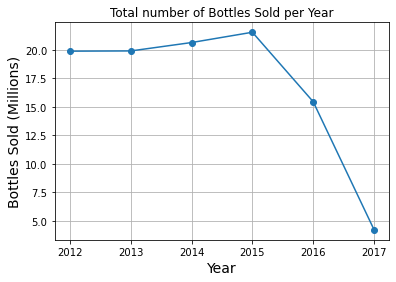

In [71]:

fig, ax = plt.subplots()
ax.plot(YearSold['Year'], YearSold['Bottles Sold (Millions)'], marker='o')
ax.set_title('Total number of Bottles Sold per Year')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Bottles Sold (Millions)', fontsize=14)
ax.grid(True)
plt.show()